## 로지스틱 회귀분류 모델

In [ ]:
### 데이터 준비하기
# - 구글드라이브 > Dataset > 머신러닝 > data > 05_생선_분류_데이터셋.csv
# - 데이터프레임 변수명 : fish

In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = './data/05_생선_분류_데이터셋.csv'
fish = pd.read_csv(file_path)
fish

# Species	Weight	Length	Diagonal	Height	Width
# 종류      무게    길이    대각선      높이    두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish.duplicated().sum()

0

In [7]:
### 종류 특성의 고유한 값 조회하기
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
### 독립변수 추출하기
# - 변수명은 fish_input
# - 사이킷런 훈련에 사용하는 형태로 만들어주세요..출력까지..

In [13]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_input = fish_input.to_numpy()

# 상위 5개 추출하기
fish_input[0:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
### 종속변수 만들기
# - 변수명 : fish_target

In [15]:
fish_target = fish['Species']
fish_target = fish_target.to_numpy()
fish_target[0:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [16]:
### 훈련데이터와 테스트데이터로 나누기
# - 변수명 어제와 동일
# - seed = 42
from sklearn.model_selection import train_test_split

In [18]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state=42)

In [19]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119,)
(40,)


In [20]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
ss.fit(train_input)

StandardScaler()

In [27]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
### k-최근접이웃분류 모델로 테스트
# - 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier(n_neighbors = 3)

In [34]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [35]:
kn.score(train_scaled, train_target)

0.8907563025210085

In [36]:
kn.score(test_scaled, test_target)

0.85

In [ ]:
# <해석>
# 학습데이터의 점수가 테스트데이터의 점수보다 0.04보다 큼
# 과대적합
# 학습모델의 성능은 좋은 편

In [37]:
kn.predict(test_scaled[0:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [38]:
test_target[0:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [39]:
np.column_stack((test_target[0:5], kn.predict(test_scaled[0:5])))

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [41]:
### 각 행의 범주들의 확률값 확인
# - 확률값의 범위 : 0 ~ 1 (0% ~ 100%)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - 사이킷런 분류 모델 공통으로 사용됨...
proba = kn.predict_proba(test_scaled[0:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [42]:
### 훈련모델이 가지고 있는 범주의 리스트 값 확인
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [45]:
### 5개의 데이터의 이웃들 확인하기..
# - 각행마다 이웃이 3개씩..
distances, indexes = kn.kneighbors(test_scaled[0:5])
print(indexes)

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]


In [66]:
train_target[indexes]

array([['Perch', 'Perch', 'Perch'],
       ['Smelt', 'Smelt', 'Smelt'],
       ['Pike', 'Pike', 'Pike'],
       ['Roach', 'Perch', 'Perch'],
       ['Perch', 'Perch', 'Roach']], dtype=object)

In [62]:
for i in range(5):
    print('{}번째 행'.format(i+1))
    for j in range(3):
        print(train_target[indexes[i][j]])
    print('\n')

1번째 행
Perch
Perch
Perch


2번째 행
Smelt
Smelt
Smelt


3번째 행
Pike
Pike
Pike


4번째 행
Roach
Perch
Perch


5번째 행
Perch
Perch
Roach




## 로지스틱 회귀분류(Logistic Regression)

In [ ]:
### 선형방정식 사용 : 다중회귀 방정식과 동일
# - z = a * x1 + b * x2 .... + y절편
# - z값 구하는 함수 : decision_function(훈련데이터)
# - z값의 범위 : 0보다 작거나 크거나..
### 확률 : 0~1 사이의 값을 사용(0% ~ 100%)
# - 따라서, z값은 확률의 0~1 사이의 값으로 변환하는 작업이 필요..
### 이때 사용하는 방법
# - 시그모이드 방식(이진분류방식 사용)
# - 소프트맥스 방식(다중분류방식 사용)
#   (모두 함수 지원됨)

## 로지스틱 회귀로 이진분류하기
##### - 시그모이드 함수 사용

In [69]:
train_scaled
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [ ]:
### 이진분류 방식은 2개의 범주만 사용가능합니다.
# - 기존 데이터에서 2개(Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 : train_bream_smelt
# 종속변수명 : target_bream_smelt

In [121]:
target_bream_smelt = np.array([])
for i in range(len(train_target)):
    if (train_target[i] == 'Bream') | (train_target[i] == 'Smelt'):
        target_bream_smelt = np.concatenate((target_bream_smelt, train_target[i]), axis=None)
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype='<U32')

In [120]:
train_bream_smelt = np.array([])
for i in range(len(train_target)):
    if (train_target[i] == 'Bream') | (train_target[i] == 'Smelt'):
        train_bream_smelt = np.concatenate((train_bream_smelt, train_scaled[i]), axis=None)
train_bream_smelt = train_bream_smelt.reshape(-1, 5)
len(train_bream_smelt)

33

In [122]:
target_bream_smelt = train_target[(train_target == 'Bream') | (train_target == 'Smelt')]
train_bream_smelt = train_scaled[(train_target == 'Bream') | (train_target == 'Smelt')]

In [123]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression

In [124]:
lr = LogisticRegression()

In [125]:
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [126]:
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [127]:
lr.predict(train_bream_smelt[0:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
### 5개 행에 대한 범주별 확률 조회

In [135]:
lr.predict_proba(train_bream_smelt[0:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [ ]:
### 훈련모델이 가지고 있는 범주의 순서

In [130]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [132]:
### 계수(또는 가중치) 및 y절편값 조회하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# -0.4037798 * Diagonal + -0.57620209 * Height + -0.66280298 * Length + 
# -1.01290277 * Weight + -0.73168947 * Width + -2.16155132

In [134]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환...
# z값 조회하기
decisions = lr.decision_function(train_bream_smelt[0:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
### <시그모이드 함수(sigmoid function) 또는 로지스틱함수>.........
# - 이진분류라고 합니다.
# - 종속변수의 범주가 2개일 때 주로 사용됨

# - 사용 패키지 : from scipy.special
# - 사용 모듈 : import expit
# - 사용 함수 : expit(z값)

# - 0/1, Y/N 처럼 둘중 하나로 분류 할 때
#   (기존에 KNN에서 사용 했었습니다.)
# - 시그모이드 값의 범위 : 0과 1 사잇값 (0% ~ 100%)
# - 범주들의 z 값을 기준으로 0과 1의 사잇값으로 변환하여 반환한다.

# - 변환 공식 : 1 / (1 + np.exp^(-z))
#   : np.exp() : 지수값으로 변화하는 함수 (0~1)
#   : -z : z값은 음수 사용
#   : z = 0 일때, 확률은 0.5(50%)
#   : z > 0 일때, 확률은 > 0.5 (51% 이상) --> 예측 확률이 높음
#   : z < 0 일때, 확률은 < 0.5 (49% 미만)
# - 여러 개 범주들 중에 확률이 가장 높은 범주 선택

In [136]:
### 시그모이드 함수 예시
import matplotlib.pyplot as plt

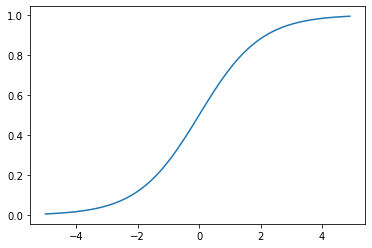

In [137]:
### 임의의 z값
z = np.arange(-5, 5, 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일 시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

## 다중분류

In [ ]:
### 다중분류는 모든 범주를 사용합니다.
# - 독립변수도 모든 특성을 사용합니다.
# - 모든 특성을 사용하다 보니 복잡도에 대한 부분을 고려해야 합니다.
#   (너무 복잡해도 안되고, 느슨해도 안되고..적당히.)
# - 사용하는 클래스 : 이진분류와 동일
# - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용

# - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
#   : alpha 값은 클수록 강도가 커졌다면,
#   : C값은 작을 수록 강도가 커집니다.
#   : 기본값은 1, 보통 20 정도로 완화 시킨 후 진행

# - 훈련반복횟수 사용
#   : 훈련모델은 정확도를 높이기 위해 일반적으로 반복 수행을 합니다.
#   : 기본 반복횟수 : 100회
#   : 훈련 중에 100회보다 더 해야 하는 경우 경고 창이 뜨는 경우 있음
#   : 독립변수의 특성이 많을 수록 훈련 반복횟수가 늘어나는 경우 발생
#   : 반복횟수 속성값 : max_iter
#   : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
# : 이외 모든 훈련 함수는 기존과 동일

In [ ]:
### 규제강도 = 20
### 반복횟수 = 1000회
# 훈련데이터와 테스트데이터에 대한 정확도 확인해 주세요...

In [138]:
lr = LogisticRegression(C = 20, max_iter = 1000)

In [139]:
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [140]:
lr.score(train_scaled, train_target)

0.9327731092436975

In [141]:
lr.score(test_scaled, test_target)

0.925

In [142]:
lr.predict(test_scaled[0:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [150]:
proba = lr.predict_proba(test_scaled[0:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [151]:
### 사용된 계수와 y절편
print(lr.coef_)
print(lr.intercept_)

[[-1.48986218 -1.02993738  2.59442524  7.70317852 -1.20029196]
 [ 0.19634317 -2.00935251 -3.78045586  6.50474233 -1.99514593]
 [ 3.56250913  6.34406974 -8.49009712 -5.75745418  3.79323748]
 [-0.10508091  3.60284124  3.9306684  -3.61707745 -1.75102734]
 [-1.40030385 -6.07531396  5.25937346 -0.87220402  1.86069287]
 [-1.38523808  1.49231583  1.39234447 -5.67720456 -4.40101089]
 [ 0.62163272 -2.32462296 -0.90625859  1.71601937  3.69354578]]
[-0.09220027 -0.26297955  3.25070806 -0.14650445  2.65466182 -6.78781452
  1.38412892]


In [154]:
decisions = lr.decision_function(test_scaled[0:5])
print(np.round(decisions, decimals=3))

[[ -6.499   1.032   5.163  -2.727   3.339   0.326  -0.634]
 [-10.86    1.927   4.77   -2.396   2.978   7.841  -4.259]
 [ -4.335  -6.233   3.174   6.488   2.357   2.421  -3.872]
 [ -0.684   0.453   2.647  -1.185   3.264  -5.753   1.258]
 [ -6.397  -1.993   5.815  -0.109   3.503  -0.112  -0.707]]


In [155]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
